## Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.


## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import json
%matplotlib inline

## Part1 

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
df1 = pd.read_json('logins.json')
pd.set_option('display.max_rows', None)

In [3]:
df1.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df1.shape

(93142, 1)

In [5]:
# make sure no missing data
df1.isnull().sum()

login_time    0
dtype: int64

In [6]:
# check data type
df1.dtypes

login_time    datetime64[ns]
dtype: object

In [7]:
#df1.login_time = pd.to_datetime(df1.login_time)

In [8]:
pd.Index(df1.login_time).is_monotonic_increasing

False

<b>Issue1: login_time Year starts from 1970 in original data</b>
<br><b>Issue2: login_time is not sorted in ascending order in original data</b>

In [9]:
df1 = df1.sort_values('login_time', ascending=True)

In [10]:
df1.head(10)

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
5,1970-01-01 20:21:41
10,1970-01-01 20:26:05
4,1970-01-01 20:26:21
11,1970-01-01 20:31:03
12,1970-01-01 20:34:46


In [11]:
# make sure date is all sorted in ascending order
pd.Index(df1.login_time).is_monotonic_increasing

True

In [12]:
# create a new column 'count' in df1 and assing value 1 to it
df1['count']=1

In [13]:
df1.head(20)

,login_time,count
6,1970-01-01 20:12:16,1
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
2,1970-01-01 20:16:37,1
5,1970-01-01 20:21:41,1
10,1970-01-01 20:26:05,1
4,1970-01-01 20:26:21,1
11,1970-01-01 20:31:03,1
12,1970-01-01 20:34:46,1


In [14]:
df1= df1.set_index('login_time')

In [15]:
df1_15t = pd.DataFrame(df1.resample('15T')['count'].sum())

In [16]:
df1_15t.head(10)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


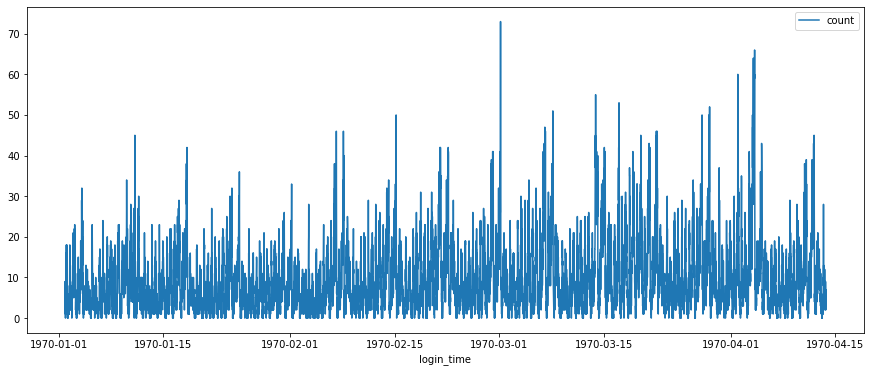

In [17]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=df1_15t)
plt.show()

In [18]:
# check if df1_15t is stationary 

from statsmodels.tsa.stattools import adfuller

result = adfuller(df1_15t)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.337954
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


As the statistic value -10.34 is less than all the critical values, meaning we can reject the null hypothesis and in turn that the time series is stationary

## Check hourly trend for login count   

In [19]:
df1_h = pd.DataFrame(df1.resample('H')['count'].sum())

In [20]:
df1_h['hourOfday'] = df1_h.index.hour

In [21]:
df1_h.head(5)

,count,hourOfday
login_time,,
1970-01-01 20:00:00,24,20
1970-01-01 21:00:00,9,21
1970-01-01 22:00:00,21,22
1970-01-01 23:00:00,58,23
1970-01-02 00:00:00,53,0


data starts from 1/1 20:00

In [22]:
df1_h.tail()

,count,hourOfday
login_time,,
1970-04-13 14:00:00,32,14
1970-04-13 15:00:00,19,15
1970-04-13 16:00:00,22,16
1970-04-13 17:00:00,22,17
1970-04-13 18:00:00,20,18


data ends on 4/13 18:00 

In [23]:
df1_h.groupby('hourOfday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
hourOfday,,,,,,,,
0,102.0,58.754902,26.689426,14.0,41.00,55.0,72.00,173.0
1,102.0,61.931373,36.550050,16.0,35.00,52.5,80.75,237.0
2,102.0,56.862745,39.672930,10.0,27.00,44.0,88.00,157.0
3,102.0,47.362745,43.286243,4.0,16.25,28.0,70.00,153.0
4,102.0,49.352941,54.485469,4.0,13.00,20.5,77.50,205.0
5,102.0,28.872549,34.566816,2.0,7.00,12.5,47.50,226.0
6,102.0,11.156863,12.741718,1.0,4.00,6.0,16.75,91.0
7,102.0,7.990196,5.096097,2.0,5.00,7.0,10.00,38.0
8,102.0,8.019608,4.209796,0.0,5.00,7.0,10.00,27.0


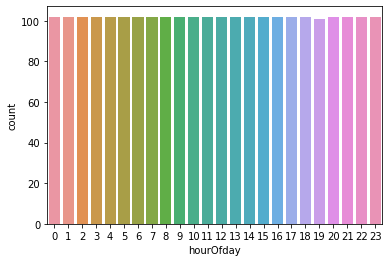

In [24]:
sns.countplot(df1_h['hourOfday'])
plt.show()

As data starts from 1/1 20:00 and ends at 4/13 18:00 therefore 19:00 has 1 hour less than other hours in terms of total count

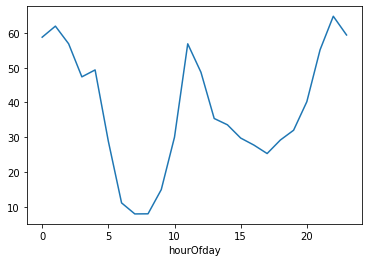

In [25]:
df1_h.groupby('hourOfday')['count'].mean().plot()
#plt.xticks(np.arange(0,24,1))
plt.show()

we can see the hourly login drops after 1am, reaches a minimum around 6am, start increasing from 7am~ 11am, drop again during 11am ~ 5pm. 
increase again from 6pm and hit maximum around 10pm. A cyclic behavior with a period of about 8 hours. 

## Check DayofWeek trend for login count

In [26]:
df1_D = pd.DataFrame(df1.resample('D')['count'].sum())

In [27]:
df1_D['dayOfweek']= df1_D.index.weekday+1

In [28]:
df1_D.head()

,count,dayOfweek
login_time,,
1970-01-01,112,4
1970-01-02,681,5
1970-01-03,793,6
1970-01-04,788,7
1970-01-05,459,1


Data starts from Thursday

In [29]:
df1_D.tail()

,count,dayOfweek
login_time,,
1970-04-09,818,4
1970-04-10,1009,5
1970-04-11,1352,6
1970-04-12,1409,7
1970-04-13,395,1


Ends on Monday 

In [30]:
df1_D.groupby('dayOfweek').describe()

count                                                           \
          count         mean         std    min      25%     50%     75%   
dayOfweek                                                                  
1          15.0   588.200000  118.806686  395.0   491.50   599.0   645.0   
2          14.0   662.000000  203.606332  464.0   543.25   616.0   708.0   
3          14.0   738.500000  189.248615  467.0   650.25   720.5   777.0   
4          15.0   797.333333  288.727174  112.0   649.50   827.0   893.5   
5          15.0  1013.866667  218.635661  681.0   863.00  1009.0  1141.0   
6          15.0  1291.800000  335.041405  793.0  1059.00  1352.0  1486.5   
7          15.0  1211.133333  262.104359  788.0   992.50  1262.0  1432.0   

                   
              max  
dayOfweek          
1           837.0  
2          1290.0  
3          1212.0  
4          1444.0  
5          1504.0  
6          1889.0  
7          1565.0

As data starts from Thursday and ends on Monday so Tuesday and Wednesday are one day less than the other days in terms of the total count

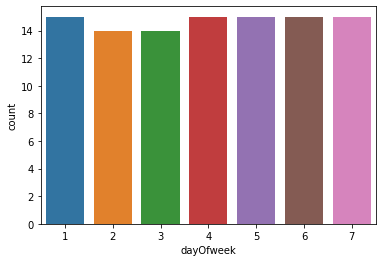

In [31]:
sns.countplot(df1_D['dayOfweek'])
plt.show()

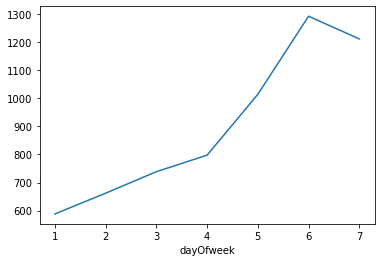

In [32]:
df1_D.groupby('dayOfweek')['count'].mean().plot()
plt.show()

We can see login increase from Thursday of the week and hits maximum on Saturday

## Check daily trend

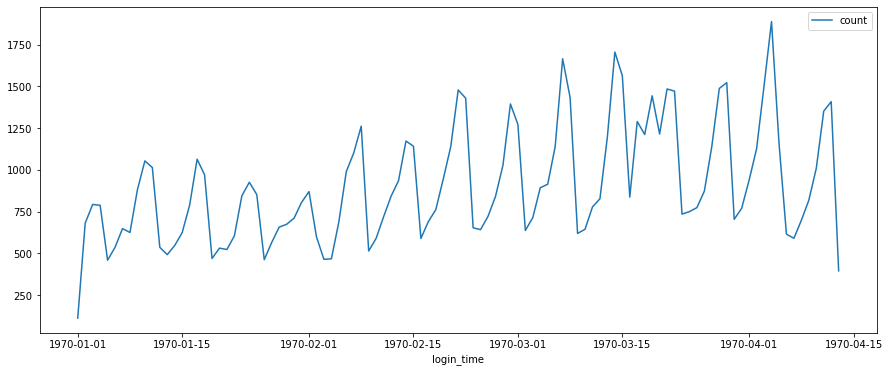

In [33]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=df1_D.drop('dayOfweek', axis=1))
plt.show()

When look at daily trend, the plot suggests some cyclic behavior with an interval of about 6~7 days: Demands hit peak around weekend and decline during weekdays.

In [34]:
# check if daily data is stationary

result = adfuller(df1_D['count'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.403316
p-value: 0.580685
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584


As the statistic value -1.40 is bigger than all the critical values, meaning we fail to reject the null hypothesis and in turn that the time series is non-stationary

## Check weekly trend for login count

In [35]:
df1_W = pd.DataFrame(df1.resample('W')['count'].sum())

In [36]:
print('number of weeks:', len(df1_W))
df1_W

number of weeks: 16


,count
login_time,
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744
1970-02-08,5572
1970-02-15,5915
1970-02-22,7035
1970-03-01,6554


for week 4/19 we only have one day data of 4/13 from 0:00 to 18:00

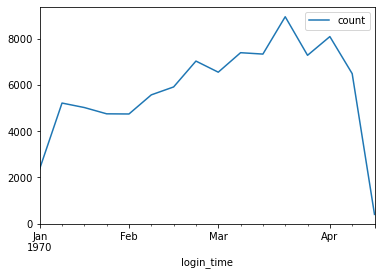

In [37]:
df1_W.plot()
plt.show()

we can see an upward trend in login from Jan towards the first week of April, hit a maximum around the 4th week in March

### check login count by weekday_hour 

In [38]:
df1_h_w = df1_h.assign(weekOfday=df1_h.index.weekday+1)

In [39]:
df1_h_w = df1_h_w.groupby(['weekOfday', 'hourOfday'])['count'].sum().reset_index()

In [40]:
df1_h_w.nlargest(10, 'count')

,weekOfday,hourOfday,count
148,7,4,2107
124,6,4,1719
147,7,3,1647
122,6,2,1608
146,7,2,1608
123,6,3,1574
121,6,1,1562
118,5,22,1519
145,7,1,1355
119,5,23,1298


if we check the login break down by weekday and hour, we can see weekends around 3 ~ 4 am is the peak of demand.
<br>This trend is different from the hourly break down we checked previously. Suggesting weekday and weekend may have different peak time. 
<br>Therefore we checked the weekday_hour trend as below:

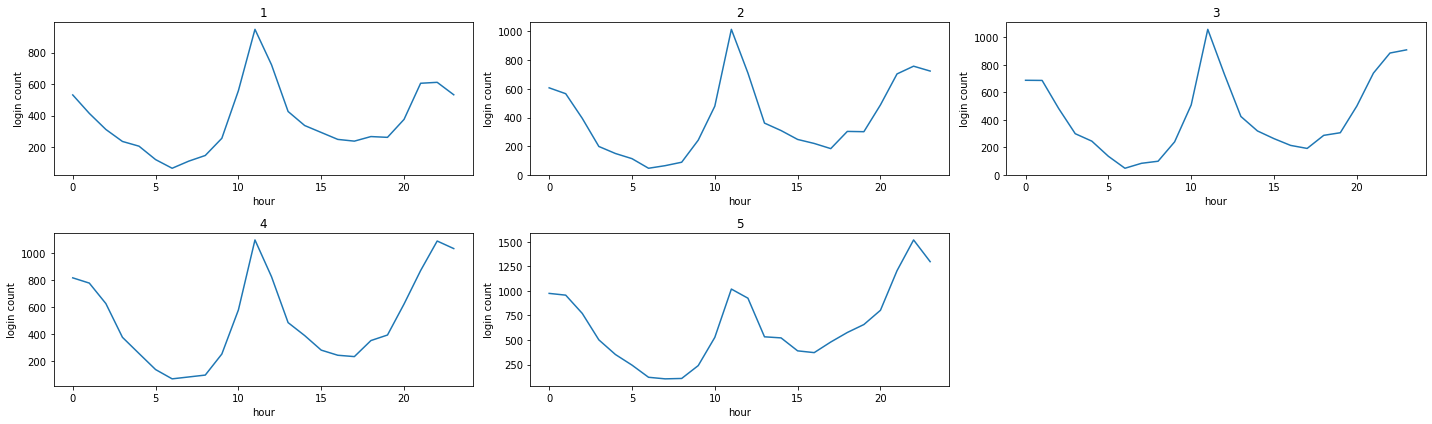

In [41]:
weekend = [6,7]
plt.figure(figsize=(20,6))
for i, day in enumerate(df1_h_w.weekOfday.unique(),1):
    if day not in weekend:
        #print(day)
        plt.subplot(2,3,i)
        plt.plot(df1_h_w.loc[df1_h_w['weekOfday']==day].hourOfday, df1_h_w.loc[df1_h_w['weekOfday']==day]['count'])
        plt.xlabel('hour')
        plt.ylabel('login count')
        plt.title(day)
plt.tight_layout()


compare it with weekend trend:

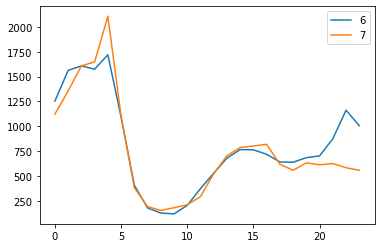

In [42]:
plt.plot(df1_h_w.loc[df1_h_w['weekOfday'] == 6].hourOfday, df1_h_w.loc[df1_h_w['weekOfday'] == 6]['count'] )
plt.plot(df1_h_w.loc[df1_h_w['weekOfday'] == 7].hourOfday, df1_h_w.loc[df1_h_w['weekOfday'] == 7]['count'] )
plt.legend([6,7])
plt.show()

## Part1 summary: 
- When look at daily trend, the plot suggests some cyclic behavior with a period of about 6~7 days. 
  Demands hit peak around weekend and decline during weekdays. 
- When look at weekly cycle, login increase from Thursday and hits maximum on Saturday.
- Druing weekday, demands have 2 peaks, first one is around 11am and second one is around 10pm.
- During weekend, demands have 1 peak around 3 ~ 4 am

## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

<b>Answer : In order to explain my experiment clearly let me do a simulation first 

<b>Simulate login data with driver id for city Gotham

In [43]:
dftest= pd.read_json('logins.json')
pd.set_option('display.max_rows', None)

In [44]:
dftest.shape

(93142, 1)

In [45]:
# assume there's 1000 driver in city Gotham
dftest = dftest.assign(driverid=np.random.choice(np.arange(0,1000), 93142, replace=True))
#dftest = dftest.assign(count=1)

In [46]:
dftest.head()

,login_time,driverid
0,1970-01-01 20:13:18,367
1,1970-01-01 20:16:10,25
2,1970-01-01 20:16:37,596
3,1970-01-01 20:16:36,899
4,1970-01-01 20:26:21,802


In [47]:
dftest= dftest.set_index('login_time')


In [48]:
dftest.shape

(93142, 1)

In [49]:
dftest.head()

,driverid
login_time,
1970-01-01 20:13:18,367
1970-01-01 20:16:10,25
1970-01-01 20:16:37,596
1970-01-01 20:16:36,899
1970-01-01 20:26:21,802


In [50]:
# get all unique driverid in city Gotham by month
dftest = dftest.resample('M')['driverid'].unique().reset_index()

In [51]:
dftest.head()

,login_time,driverid
0,1970-01-31,"[149, 367, 25, 899, 596, 333, 398, 802, 839, 5..."
1,1970-02-28,"[114, 259, 641, 607, 413, 342, 126, 320, 228, ..."
2,1970-03-31,"[431, 238, 690, 577, 858, 519, 639, 702, 485, ..."
3,1970-04-30,"[115, 759, 548, 988, 841, 448, 260, 994, 401, ..."


In [52]:
dftest = dftest.set_index('login_time')

In [53]:
dftest.head()

,driverid
login_time,
1970-01-31,"[149, 367, 25, 899, 596, 333, 398, 802, 839, 5..."
1970-02-28,"[114, 259, 641, 607, 413, 342, 126, 320, 228, ..."
1970-03-31,"[431, 238, 690, 577, 858, 519, 639, 702, 485, ..."
1970-04-30,"[115, 759, 548, 988, 841, 448, 260, 994, 401, ..."


In [54]:
# get unique driverid in January for city Gotham
driverid_Jan_cityG = dftest.loc['1970-01-31'].driverid

In [55]:
driverid_Jan_cityG

array([149, 367,  25, 899, 596, 333, 398, 802, 839, 565, 116, 969,  83,
       834, 968, 374, 588, 273,  86, 150, 482,  69, 452, 115, 556, 154,
       799, 814, 260, 869, 120, 100, 859, 186, 974, 784, 843,  74, 187,
       140, 194, 751, 369, 372, 241,  79, 279, 218, 935, 403, 992, 822,
       373, 354, 663, 726, 832, 160, 263,  66, 702, 942, 156, 892, 512,
       424, 923, 853, 503, 358, 703,  24, 888, 696, 248,  29, 811, 362,
       285, 280, 133, 422, 430, 995, 776, 395, 665, 722, 976, 651, 568,
       817, 862, 370, 418, 883, 772,  65, 351, 896, 909, 758, 535, 526,
       941, 249, 805, 148, 960, 308, 323, 135, 884, 338, 724, 541, 278,
        18, 236, 326, 952, 142, 617,  68, 531, 700, 432,   2, 704, 141,
       245, 826, 377, 484, 736, 716,  34, 925, 729, 493, 961,  84, 467,
       296, 577,  21, 754, 904, 393, 344, 151, 444, 566, 464, 257, 359,
       237, 383, 857, 610, 168, 813, 129, 474,  27, 223, 567, 527, 911,
       760, 963, 438, 178, 283, 927, 662, 210, 341, 840, 637, 67

<b>Simulate login data with driver id for city Metropolis:

In [56]:
dftest2= pd.read_json('logins.json')

In [57]:
# assume there are also 1000 drivers in city Metropolis but only about 200 of them travel cross 2 cities
dftest2 = dftest2.assign(driverid=np.random.choice(np.arange(800,1800), 93142, replace=True))
#dftest = dftest.assign(count=1)

In [58]:
dftest2.head()

,login_time,driverid
0,1970-01-01 20:13:18,885
1,1970-01-01 20:16:10,1352
2,1970-01-01 20:16:37,853
3,1970-01-01 20:16:36,1408
4,1970-01-01 20:26:21,923


In [59]:
dftest2= dftest2.set_index('login_time')

In [60]:
dftest2.shape

(93142, 1)

In [61]:
dftest2.head()

,driverid
login_time,
1970-01-01 20:13:18,885
1970-01-01 20:16:10,1352
1970-01-01 20:16:37,853
1970-01-01 20:16:36,1408
1970-01-01 20:26:21,923


In [62]:
# get all unique driverid in city Metropolis by month
dftest2 = dftest2.resample('M')['driverid'].unique().reset_index()

In [63]:
dftest2.head()

,login_time,driverid
0,1970-01-31,"[903, 885, 1352, 1408, 853, 1152, 1462, 923, 1..."
1,1970-02-28,"[1652, 859, 1104, 1527, 1756, 1294, 869, 1716,..."
2,1970-03-31,"[1624, 1774, 1030, 1588, 1638, 1123, 1623, 126..."
3,1970-04-30,"[1695, 1770, 1197, 1715, 1335, 1035, 1242, 168..."


In [64]:
dftest2 = dftest2.set_index('login_time')

In [65]:
dftest2.head()

,driverid
login_time,
1970-01-31,"[903, 885, 1352, 1408, 853, 1152, 1462, 923, 1..."
1970-02-28,"[1652, 859, 1104, 1527, 1756, 1294, 869, 1716,..."
1970-03-31,"[1624, 1774, 1030, 1588, 1638, 1123, 1623, 126..."
1970-04-30,"[1695, 1770, 1197, 1715, 1335, 1035, 1242, 168..."


In [66]:
# get unique driverid in January for city Metropolis
driverid_Jan_cityM = dftest2.loc['1970-01-31'].driverid

In [67]:
driverid_Jan_cityM

array([ 903,  885, 1352, 1408,  853, 1152, 1462,  923, 1507, 1079, 1199,
       1563, 1347, 1084, 1467,  882, 1182, 1602,  902, 1660,  910, 1269,
       1231, 1785, 1053, 1303, 1183, 1006, 1746, 1481, 1252, 1728, 1603,
        957, 1146, 1258, 1513, 1185, 1301,  924, 1624, 1738, 1668, 1689,
       1166, 1712,  804, 1332, 1052, 1549,  965,  810, 1570, 1330,  978,
       1704, 1598, 1011, 1201, 1172, 1304, 1298, 1470, 1472, 1164,  887,
       1419, 1734,  999,  927, 1516, 1377, 1338, 1583, 1623, 1597, 1105,
       1510,  861, 1431, 1434, 1579, 1316,  815, 1576, 1637, 1491, 1282,
        890, 1435, 1778, 1700, 1335, 1674,  986,  817, 1111, 1099, 1440,
       1382, 1735,  955, 1659, 1663, 1008, 1585, 1056, 1139, 1001, 1569,
        833, 1468,  934, 1333, 1285, 1718, 1411, 1089, 1027, 1180, 1025,
       1144, 1188, 1158,  899, 1675, 1450, 1050, 1780,  884, 1568, 1318,
       1460,  900, 1230, 1043, 1101, 1518, 1013,  997, 1699, 1744, 1539,
       1073, 1356, 1701, 1605, 1488,  959,  857, 17

In [68]:
# count the number of the drivers that drive cross 2 cities 
crossbridge_driver_Jan = len(np.intersect1d(driverid_Jan_cityM, driverid_Jan_cityG))
crossbridge_driver_Jan
print('Number of drivers who drive cross 2 cities in Jan is: ', crossbridge_driver_Jan)

Number of drivers who drive cross 2 cities in Jan is:  200


## Process:

1. Track driverid together with login_time in city Gotham and Metropolis
2. Key metrics: <b>crossbridge_driver/Month</b>

3. Following the process above we can:
<br>1)Start the experiment for 3 months and average the montly crossbridge_driver (sample mean)
<br>2)Average number of monthly crossbridge_driver 1 year prior to the experiment (population mean)
<br>3)Compare mean_before and mean_after, use t-test to prove that the mean_after has increased

4. Hypothesis:
<br>H0: The monthly average crossbridge_driver did not change after the experiment. (no difference between mean_before and mean_after)
<br>HA: The monthly average crossbridge_driver increased after the experiment.(mean_before<mean_after)

5. we will use α level of 0.05.
<br>It is a one-tail alternative hypothesis
<br>We will use t-test to test the null hypothesis
<br>We will calculate the test statistic 
<br>We will calculate the p-value associated with our test statistic

<b>Simulate experiment result:</b>

In [69]:
from scipy.stats import t

In [70]:
# simulate crossbridge_driver number in each month for the past 12 months before starting the experiment
before = np.random.choice(np.arange(100, 300), 12)


# simulate crossbridge_driver number in each month for 3 months after starting the experiment, assume the number increased than before
after = np.random.choice(np.arange(300, 500), 3)


In [71]:
print(before)
print(after)

[127 103 257 212 146 261 153 237 216 141 125 279]
[494 421 461]


In [72]:
# simulate population mean_before by resampling 3 samples with replacement from 'before' and calculate the mean for 10000 times
sample_mean_list = [np.mean(np.random.choice(before, 3, replace=True)) for i in range(10000)]

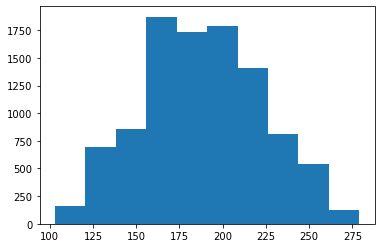

In [73]:
plt.hist(sample_mean_list)
plt.show()

In [74]:
mean_before = np.mean(sample_mean_list)
mean_before = round(mean_before)
mean_before

189.0

In [75]:
mean_after = round(np.mean(after))
mean_after

459.0

In [76]:
t_score = (mean_before-mean_after)/(np.std(after)/np.sqrt(len(after)))
t_score

-15.66796599414277

In [77]:
pval = t.sf(np.abs(t_score), df=3-1)
print(pval)

0.0020244214532964336


As Pval < 0.05, therefore we can reject null hypothesis and say the experiment did succeed

In [78]:
# dftest.login_time = dftest.login_time.apply(lambda x: x.date())

# dftest.dtypes

# dftest.login_time = dftest.login_time.astype('datetime64[D]')

# dftest.dtypes

# dftest.shape
# #dftest.head()

# dftest = dftest.groupby(['login_time','driverid'])['count'].sum().reset_index()

# dftest.head()

# dftest = dftest.set_index('login_time')


# dftest.loc[dftest.driverid==3541]

# #pd.DataFrame(dftest.resample('M')['driverid'].value_counts())

# dftest.shape

# dftest.head()

# dftest[dftest['count']>2].head()

# dftest.dtypes

# dftest = dftest.set_index(['login_time', 'driverid'])

# dftest.shape

# dftest.index

# dftest.head()

# dftest2= pd.read_json('logins.json')

# dftest2 = dftest2.assign(driverid=np.random.choice(np.arange(9900,19900), 93142, replace=True))
# dftest2 = dftest2.assign(count=1)

# dftest2.login_time = dftest2.login_time.apply(lambda x: x.date())

# dftest2.dtypes

# dftest2.login_time = dftest2.login_time.astype('datetime64[D]')

# dftest2.dtypes

# dftest2.shape
# #dftest.head()

# dftest2 = dftest2.groupby(['login_time','driverid'])['count'].sum().reset_index()

# dftest2.head()

# dftest2.shape

# dftest2.head()

# dftest2[dftest2['count']>2].head()

# dftest2.dtypes

# dftest2 = dftest2.set_index(['login_time', 'driverid'])

# dftest2.shape

# dftest2.index

# dftest2.head()

# len(np.intersect1d(dftest.index, dftest2.index))

# merged= dftest.merge(dftest2, how='inner', left_index=True, right_index=True)

# merged.head()

# merged.shape

## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

<b>Data description
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after
- signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
- FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

In [165]:
df2 = pd.read_json('ultimate_data_challenge.json')

In [166]:
df2.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [167]:
df2.shape

(50000, 12)

In [168]:
pd.DataFrame((df2.isnull().sum(),df2.dtypes), index=['missing value', 'data type']).T

,missing value,data type
city,0,object
trips_in_first_30_days,0,int64
signup_date,0,object
avg_rating_of_driver,8122,float64
avg_surge,0,float64
last_trip_date,0,object
phone,396,object
surge_pct,0,float64
ultimate_black_user,0,bool
weekday_pct,0,float64


In [169]:
df2.phone.fillna('None', inplace=True)

In [170]:
df2.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [171]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00


In [172]:
# df2[['signup_date', 'last_trip_date' ]] = pd.to_datetime(df2[['signup_date', 'last_trip_date' ]],format='%Y-%m-%d')
df2['signup_date'] = pd.to_datetime(df2['signup_date'])
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])

In [173]:
print('latest date of signup: {}'.format(df2['signup_date'].max()))
print('latest date of lastrtip: {}'.format(df2['last_trip_date'].max()))

latest date of signup: 2014-01-31 00:00:00
latest date of lastrtip: 2014-07-01 00:00:00


We assume the day they pulled the data was 2014-07-01
Therefore the retained user is the one who took a trip in the preceding 30 days which means last_trip_date should be in June or July.
<br>Also this is what we define 'acitve user in their 6th month' as they all signed up in Jan 2014

In [174]:
df2['active_6month'] = np.where((df2.last_trip_date.map(lambda x: x.month)>=6),1,0)
retained_pct = df2.active_6month.value_counts(normalize=True)
retained_pct

0    0.62392
1    0.37608
Name: active_6month, dtype: float64

In [175]:
print('The fraction of retained users is:{:.2%}'.format(retained_pct[1]))

The fraction of retained users is:37.61%


In [176]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_6month
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


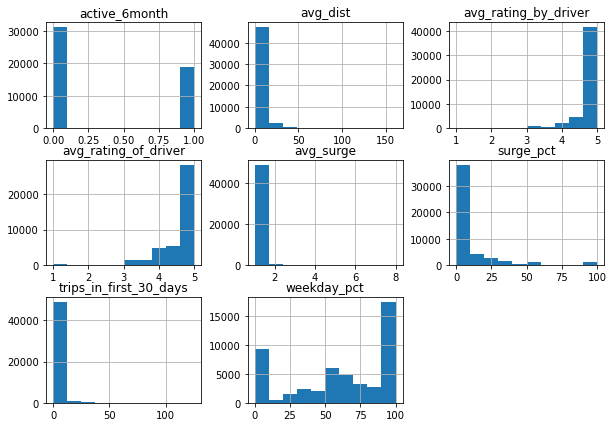

In [177]:
df2.select_dtypes(include=['float', 'int']).hist(figsize=(10,7))
plt.show()

In [178]:
#df2[df2['last_trip_date']=='2014-07-01 00:00:00'].shape[0]

In [179]:
#df2[['signup_date', 'last_trip_date']] = df2[['signup_date', 'last_trip_date']].astype('category')

In [180]:
pd.DataFrame((df2.isnull().sum(),df2.dtypes), index=['missing value', 'data type']).T

,missing value,data type
city,0,object
trips_in_first_30_days,0,int64
signup_date,0,datetime64[ns]
avg_rating_of_driver,8122,float64
avg_surge,0,float64
last_trip_date,0,datetime64[ns]
phone,0,object
surge_pct,0,float64
ultimate_black_user,0,bool
weekday_pct,0,float64


In [181]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_6month
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [182]:
#df2_features= df2.drop(['surge_pct', 'signup_date','last_trip_date'], axis=1)

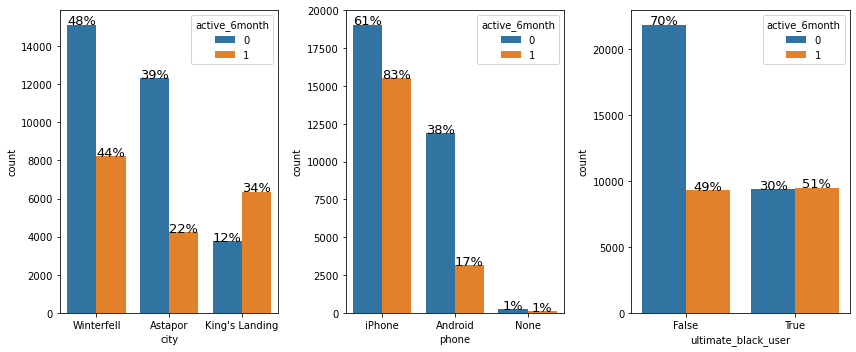

In [183]:
plt.figure(figsize=(12,5))
for i, col in enumerate(['city', 'phone', 'ultimate_black_user'],1):
    plt.subplot(1,3,i)
    ax = sns.countplot(col, data=df2, hue='active_6month', order=df2[col].value_counts().index)
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total_left = df2[df2.active_6month==0].shape[0]
        total_right = df2[df2.active_6month==1].shape[0]

        ax.text(left.get_x() + left.get_width()/2., height_l + 3, '{0:.0%}'.format(height_l/total_left), ha="center",fontsize=13)
        ax.text(right.get_x() + right.get_width()/2., height_r + 3, '{0:.0%}'.format(height_r/total_right), ha="center",fontsize=13)

plt.tight_layout()

In [184]:
list_numerical = df2.select_dtypes(include=['float', 'int']).columns.tolist()
list_numerical

['trips_in_first_30_days',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver',
 'active_6month']

In [185]:
# plt.figure(figsize=(12,5))
# #fig, axs = plt.subplots(2,4)
# for index, col in enumerate(list_float,1):
#     plt.subplot(2,4,index)
#     if col != 'active_6month':
#         sns.boxplot(data=df2[list_float], x='active_6month', y=col)
# plt.tight_layout()

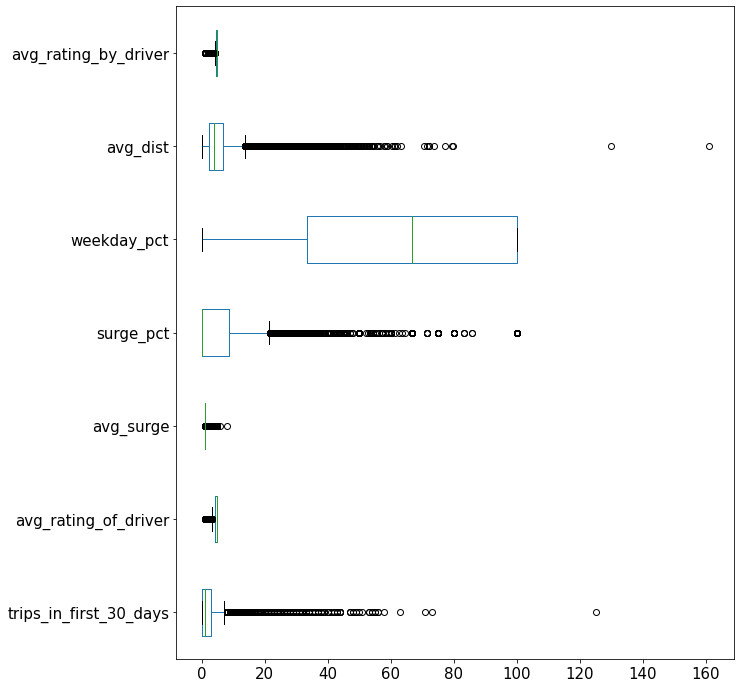

In [186]:
# check outliers
df2[list_numerical].drop('active_6month',axis=1).boxplot(grid=False, vert=False,fontsize=15,figsize=(10,12))
plt.show()

### Experiment 1: Drop outliers

In [187]:
Q1 = df2[list_numerical].quantile(0.25)
Q3 = df2[list_numerical].quantile(0.75)

IQR = Q3 - Q1

# drop outliers
df2[list_numerical]= df2[list_numerical][~((df2[list_numerical]<(Q1 - 1.5*IQR))| (df2[list_numerical]>(Q3 + 1.5*IQR))).any(axis=1)]

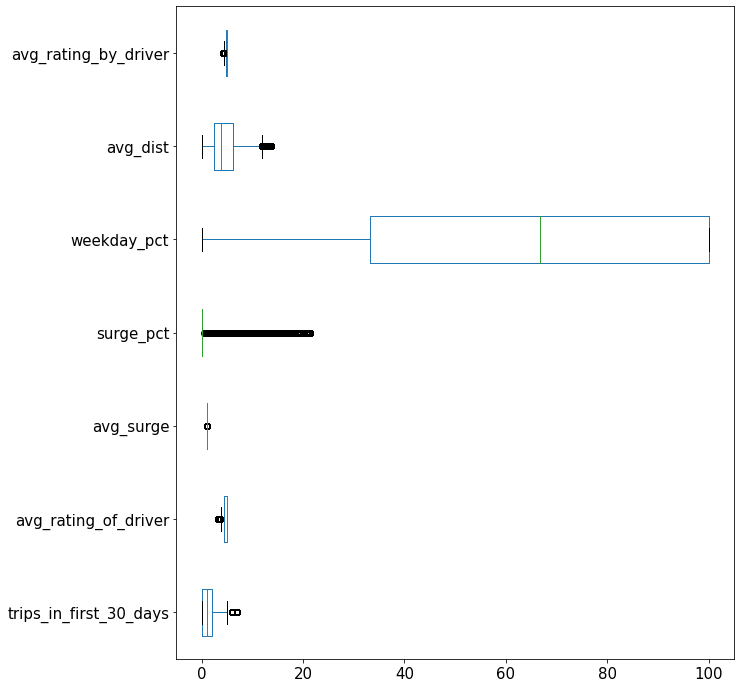

In [188]:
df2[list_numerical].drop('active_6month',axis=1).boxplot(grid=False, vert=False,fontsize=15,figsize=(10,12))
plt.show()

In [189]:
df2.shape

(50000, 13)

In [190]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,30112.0,1.580001,1.726138,0.0,0.00,1.00,2.00,7.00
avg_rating_of_driver,25006.0,4.702791,0.418383,3.3,4.50,5.00,5.00,5.00
avg_surge,30112.0,1.008791,0.024032,1.0,1.00,1.00,1.00,1.12
surge_pct,30112.0,1.596500,4.238052,0.0,0.00,0.00,0.00,21.40
weekday_pct,30112.0,61.686623,37.362467,0.0,33.30,66.70,100.00,100.00
avg_dist,30112.0,4.635377,3.056250,0.0,2.36,3.76,6.18,13.72
avg_rating_by_driver,29972.0,4.887288,0.185860,4.3,4.80,5.00,5.00,5.00
active_6month,30112.0,0.364705,0.481355,0.0,0.00,0.00,1.00,1.00


In [191]:
df2.isnull().sum()

city                          0
trips_in_first_30_days    19888
signup_date                   0
avg_rating_of_driver      24994
avg_surge                 19888
last_trip_date                0
phone                         0
surge_pct                 19888
ultimate_black_user           0
weekday_pct               19888
avg_dist                  19888
avg_rating_by_driver      20028
active_6month             19888
dtype: int64

In [192]:
df2.dropna(subset=['active_6month'],inplace=True)

In [193]:
df2.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      5106
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       140
active_6month                0
dtype: int64

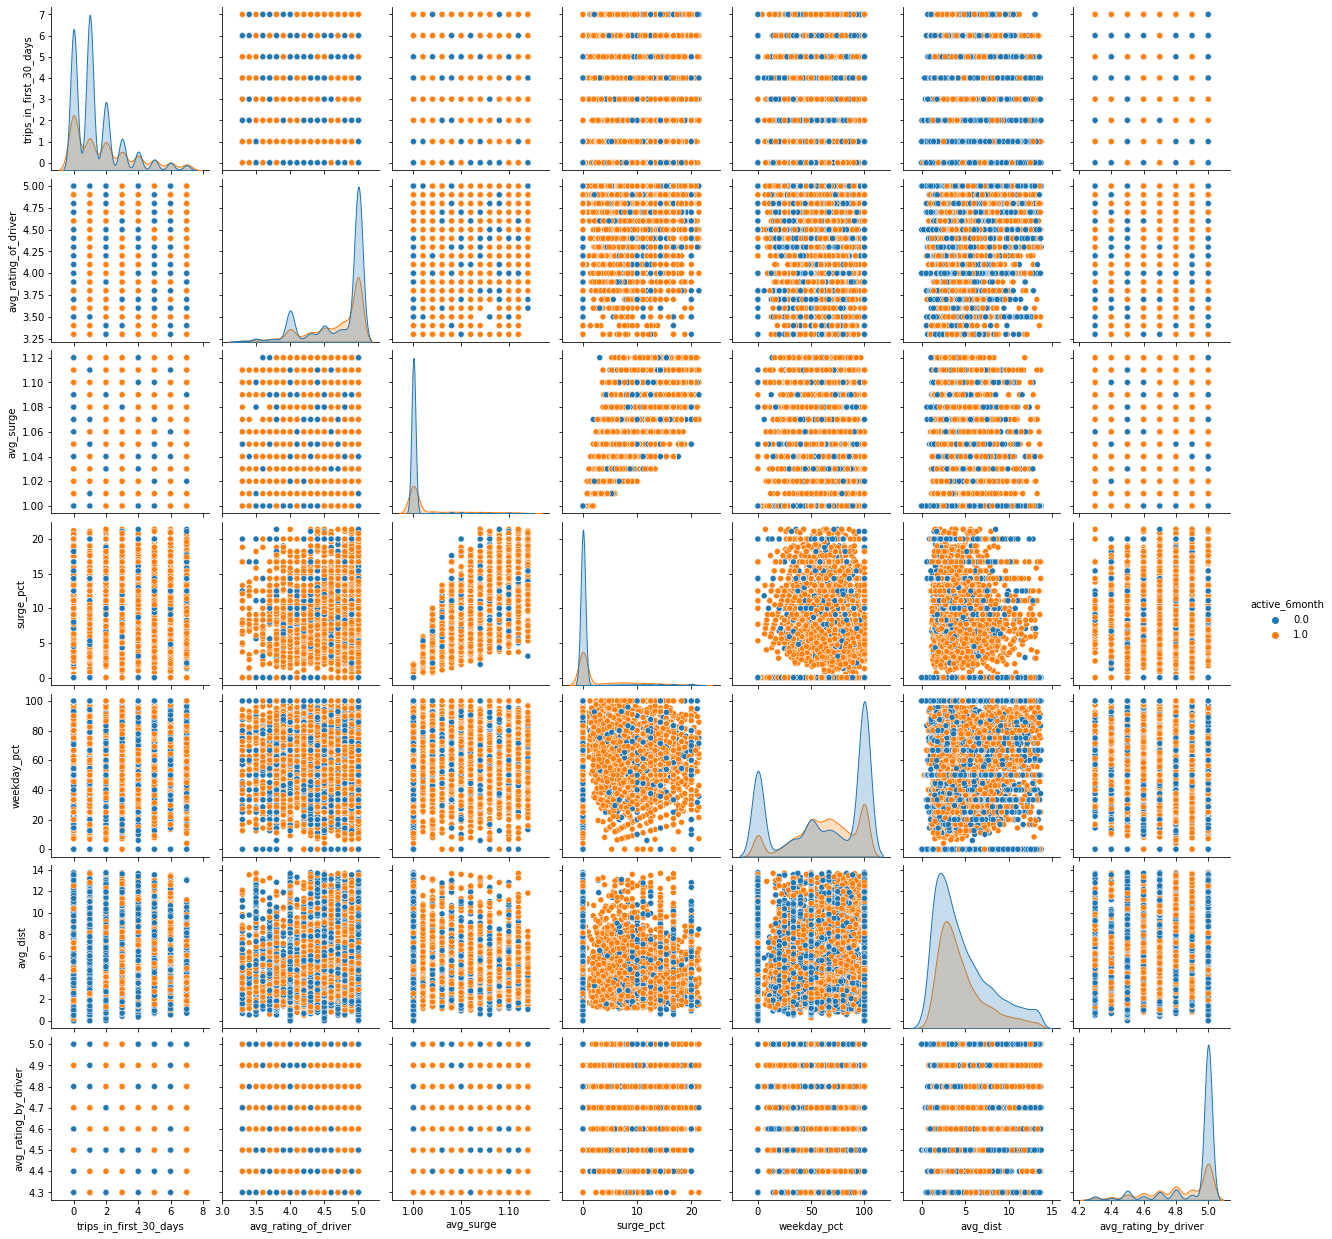

In [194]:
sns.pairplot(data=df2[list_numerical], hue='active_6month')
plt.show()

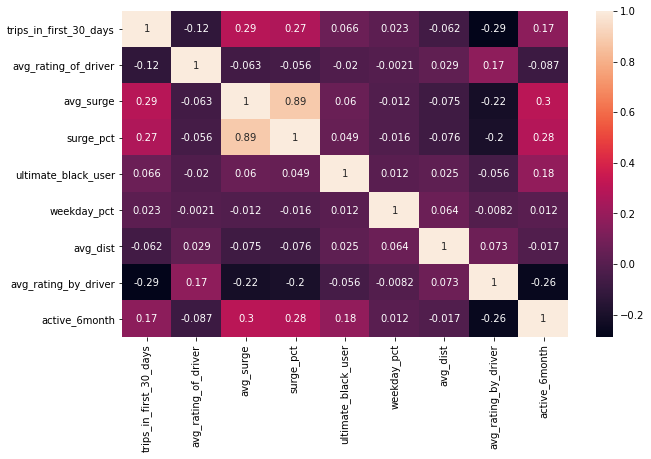

In [195]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [196]:
X = df2.drop(['active_6month', 'surge_pct', 'signup_date','last_trip_date'], axis=1)
y = df2.active_6month

In [197]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()
cat_feature_indices= []

for i, j in enumerate(X.columns):
    if j in cat_features:
        cat_feature_indices.append(i)

In [198]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.to_numpy(), y.ravel(), test_size=0.30, stratify=y, random_state=43)

In [199]:
y_test.sum()/len(y_test)

0.36473323001992475

In [200]:
np.unique(y_test, return_counts=True)

(array([0., 1.]), array([5739, 3295]))

## Model Catboost

In [201]:
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold

In [202]:
# def trainmodel_cv(model, n):
    
#     cv = KFold(n_splits=n)
#     for i, (train, test) in enumerate(cv.split(X_train, y_train)):
#         X_train_fold, y_train_fold = X_train[train], y_train[train]
#         X_test_fold, y_test_fold = X_train[test], y_train[test]
#         model.fit(X_train_fold, y_train_fold, cat_features = cat_feature_indices, silent=True)
    
#     return model

In [203]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [204]:
# final_model = trainmodel_cv(CatBoostClassifier(),)

final_model = CatBoostClassifier()
final_model.fit(X_train, y_train, cat_features = cat_feature_indices, silent=True)

y_pred = final_model.predict(X_test)
ypred_proba = final_model.predict_proba(X_test)[:,1]


precision, recall, f1score, support = score(y_test, y_pred, pos_label=1,average='binary')
roc_auc = roc_auc_score(y_test, ypred_proba)

accuracy = round(accuracy_score(y_test,y_pred),3)

In [205]:
pd.DataFrame([precision, recall, f1score, roc_auc, accuracy],
                       index=['precison','recall','f1score','roc_auc', 'accuracy']).T

,precison,recall,f1score,roc_auc,accuracy
0,0.751825,0.656449,0.700907,0.858453,0.796


In [206]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,  y_pred, labels=[1,0])

array([[2163, 1132],
       [ 714, 5025]])

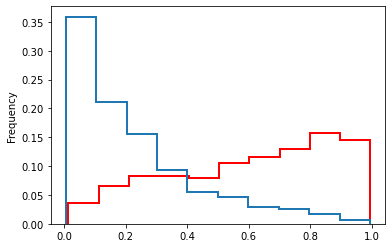

In [207]:
predProba_label = pd.DataFrame()
predProba_label['proba'] = ypred_proba
predProba_label['label'] = y_test

weights_1 = np.ones_like(predProba_label[predProba_label['label']==1].proba.index)/len(predProba_label[predProba_label['label']==1].proba.index)
predProba_label[predProba_label['label']==1].proba.plot(kind='hist',
                                                                      bins=10,
                                                                      color='r',
                                                                      label='Target',
                                                                      histtype='step',
                                                                      stacked=False,
                                                                      lw=2,
                                                                      weights=weights_1,
                                                                      )


weights_2 = np.ones_like(predProba_label[predProba_label['label']==0].proba.index)/len(predProba_label[predProba_label['label']==0].proba.index)
predProba_label[predProba_label['label']==0].proba.plot(kind='hist',
                                                                     bins=10,
                                                                     label='non-Target',
                                                                     histtype='step',
                                                                     stacked=False,
                                                                     lw=2,
                                                                     weights=weights_2,
                                                                     )

In [208]:
from catboost import Pool
train_pool = Pool(X_train, y_train, cat_features=cat_feature_indices)
feature_names = X.columns
#final_model = trainmodel_cv(CatBoostClassifier(iterations=939,  depth=4, learning_rate=0.014877, silent=True), 5)
feature_importances  = final_model.get_feature_importance(train_pool)

feature_df = pd.DataFrame(sorted(zip(feature_importances, feature_names), reverse=True), columns=['Feature Importance', 'Variable'])

In [209]:
feature_df

,Feature Importance,Variable
0,22.308311,weekday_pct
1,14.251382,city
2,14.181031,avg_rating_by_driver
3,11.900589,trips_in_first_30_days
4,10.532034,avg_dist
5,8.182758,avg_surge
6,7.485051,phone
7,6.512378,avg_rating_of_driver
8,4.646467,ultimate_black_user


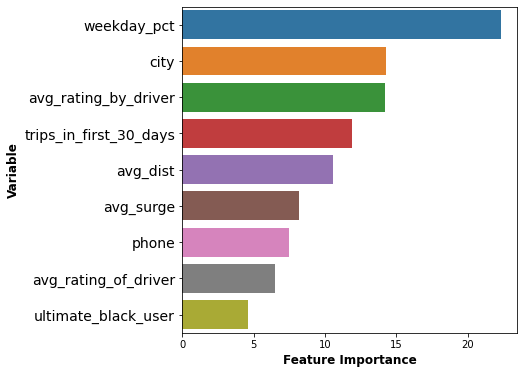

In [210]:
plt.figure(figsize=(6,6))
g = sns.barplot('Feature Importance', 'Variable', data=feature_df)
g.set_xlabel('Feature Importance',fontsize=12,weight='bold')
g.set_ylabel('Variable',size=12,weight='bold')
g.set_yticklabels(g.get_yticklabels(),size=14)
plt.show()

## Model Lightgbm

In [211]:
import lightgbm as lgb
from sklearn.metrics import classification_report

In [212]:
X.dtypes

city                       object
trips_in_first_30_days    float64
avg_rating_of_driver      float64
avg_surge                 float64
phone                      object
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [213]:
X[['city', 'phone']] = X[['city', 'phone']].astype('category')

In [214]:
X.city.value_counts()

Winterfell        13838
Astapor           10259
King's Landing     6015
Name: city, dtype: int64

In [215]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=43)

In [216]:
model = lgb.LGBMClassifier(loss_function= 'Logloss', custom_metric=['Accuracy','AUC'],eval_metric='Recall')
model.fit(X_train, y_train, eval_set=(X_test, y_test), feature_name='auto', categorical_feature = 'auto', verbose=10)

expected_y  = y_test
y_pred = model.predict(X_test)


[10]	valid_0's binary_logloss: 0.504254
[20]	valid_0's binary_logloss: 0.467919
[30]	valid_0's binary_logloss: 0.456089
[40]	valid_0's binary_logloss: 0.452133
[50]	valid_0's binary_logloss: 0.449566
[60]	valid_0's binary_logloss: 0.448806
[70]	valid_0's binary_logloss: 0.448569
[80]	valid_0's binary_logloss: 0.44903
[90]	valid_0's binary_logloss: 0.449639
[100]	valid_0's binary_logloss: 0.449334


In [217]:
print(classification_report(expected_y, y_pred))
print(confusion_matrix(expected_y, y_pred, labels=[1,0]))

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84      5739
         1.0       0.75      0.66      0.70      3295

    accuracy                           0.79      9034
   macro avg       0.78      0.77      0.77      9034
weighted avg       0.79      0.79      0.79      9034

[[2184 1111]
 [ 744 4995]]


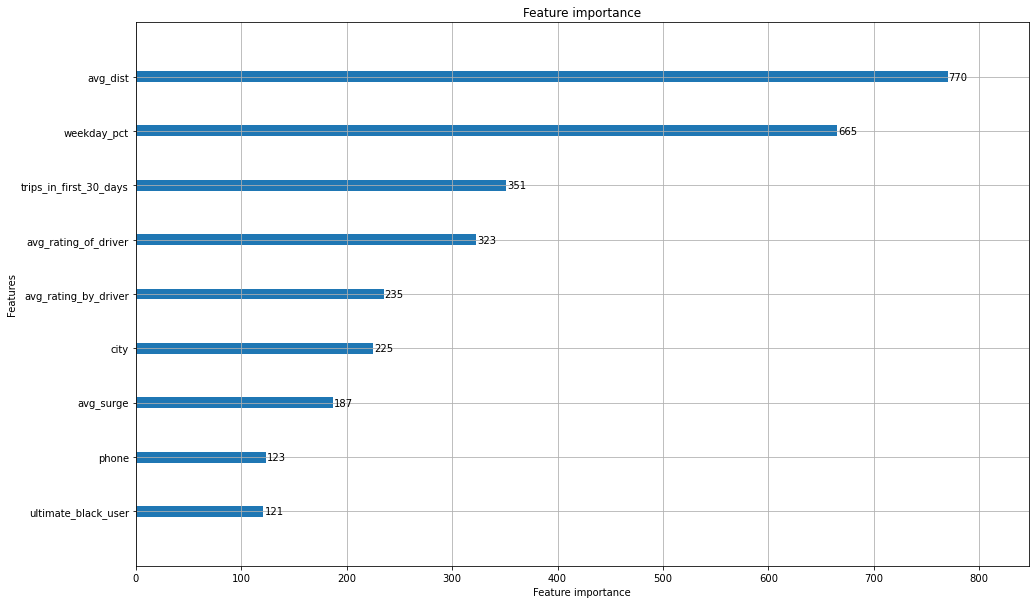

In [218]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(16, 10))
plot_importance(model,ax=ax)
plt.show()

## Experiment 2: Do not drop outliers

In [219]:
df2 = pd.read_json('ultimate_data_challenge.json')

In [220]:
df2['signup_date'] = pd.to_datetime(df2['signup_date'])
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])

df2['active_6month'] = np.where((df2.last_trip_date.map(lambda x: x.month)>=6),1,0)

In [221]:
df2.phone.fillna('None', inplace=True)

In [222]:
X = df2.drop(['active_6month', 'surge_pct', 'signup_date','last_trip_date'], axis=1)
y = df2.active_6month

In [223]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()
cat_feature_indices= []

for i, j in enumerate(X.columns):
    if j in cat_features:
        cat_feature_indices.append(i)

In [224]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.to_numpy(), y.ravel(), test_size=0.30, stratify=y, random_state=43)

In [225]:
y_test.sum()/len(y_test)

0.37606666666666666

In [226]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([9359, 5641]))

## Model Catboost

In [227]:
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold

In [228]:
# def trainmodel_cv(model, n):
    
#     cv = KFold(n_splits=n)
#     for i, (train, test) in enumerate(cv.split(X_train, y_train)):
#         X_train_fold, y_train_fold = X_train[train], y_train[train]
#         X_test_fold, y_test_fold = X_train[test], y_train[test]
#         model.fit(X_train_fold, y_train_fold, cat_features = cat_feature_indices, silent=True)
    
#     return model

In [229]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [230]:
# final_model = trainmodel_cv(CatBoostClassifier(),)

final_model = CatBoostClassifier()
final_model.fit(X_train, y_train, cat_features = cat_feature_indices, silent=True)

y_pred = final_model.predict(X_test)
ypred_proba = final_model.predict_proba(X_test)[:,1]


precision, recall, f1score, support = score(y_test, y_pred, pos_label=1,average='binary')
roc_auc = roc_auc_score(y_test, ypred_proba)

accuracy = round(accuracy_score(y_test,y_pred),3)

In [231]:
pd.DataFrame([precision, recall, f1score, roc_auc, accuracy],
                       index=['precison','recall','f1score','roc_auc', 'accuracy']).T

,precison,recall,f1score,roc_auc,accuracy
0,0.755176,0.666017,0.7078,0.859224,0.793


In [232]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,  y_pred, labels=[1,0])

array([[3757, 1884],
       [1218, 8141]])

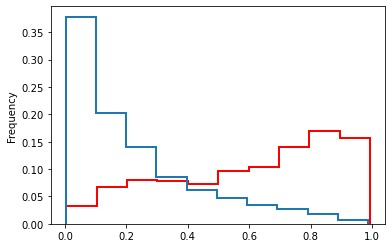

In [233]:
predProba_label = pd.DataFrame()
predProba_label['proba'] = ypred_proba
predProba_label['label'] = y_test

weights_1 = np.ones_like(predProba_label[predProba_label['label']==1].proba.index)/len(predProba_label[predProba_label['label']==1].proba.index)
predProba_label[predProba_label['label']==1].proba.plot(kind='hist',
                                                                      bins=10,
                                                                      color='r',
                                                                      label='Target',
                                                                      histtype='step',
                                                                      stacked=False,
                                                                      lw=2,
                                                                      weights=weights_1,
                                                                      )


weights_2 = np.ones_like(predProba_label[predProba_label['label']==0].proba.index)/len(predProba_label[predProba_label['label']==0].proba.index)
predProba_label[predProba_label['label']==0].proba.plot(kind='hist',
                                                                     bins=10,
                                                                     label='non-Target',
                                                                     histtype='step',
                                                                     stacked=False,
                                                                     lw=2,
                                                                     weights=weights_2,
                                                                     )

In [234]:
from catboost import Pool
train_pool = Pool(X_train, y_train, cat_features=cat_feature_indices)
feature_names = X.columns
#final_model = trainmodel_cv(CatBoostClassifier(iterations=939,  depth=4, learning_rate=0.014877, silent=True), 5)
feature_importances  = final_model.get_feature_importance(train_pool)

feature_df = pd.DataFrame(sorted(zip(feature_importances, feature_names), reverse=True), columns=['Feature Importance', 'Variable'])

In [235]:
feature_df

,Feature Importance,Variable
0,21.262735,weekday_pct
1,14.990802,avg_rating_by_driver
2,14.559026,city
3,12.374024,trips_in_first_30_days
4,9.148342,avg_dist
5,9.062169,avg_surge
6,7.366014,phone
7,6.087934,avg_rating_of_driver
8,5.148953,ultimate_black_user


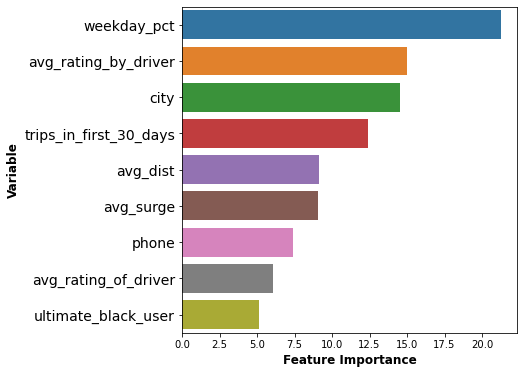

In [236]:
plt.figure(figsize=(6,6))
g = sns.barplot('Feature Importance', 'Variable', data=feature_df)
g.set_xlabel('Feature Importance',fontsize=12,weight='bold')
g.set_ylabel('Variable',size=12,weight='bold')
g.set_yticklabels(g.get_yticklabels(),size=14)
plt.show()

## Model Lightgbm

In [237]:
import lightgbm as lgb
from sklearn.metrics import classification_report

In [238]:
X.dtypes

city                       object
trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
phone                      object
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [239]:
X[['city', 'phone']] = X[['city', 'phone']].astype('category')

In [240]:
X.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [241]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=43)

In [242]:
model = lgb.LGBMClassifier(loss_function= 'Logloss', custom_metric=['Accuracy','AUC'],eval_metric='Recall')
model.fit(X_train, y_train, eval_set=(X_test, y_test), feature_name='auto', categorical_feature = 'auto', verbose=10)

expected_y  = y_test
y_pred = model.predict(X_test)


[10]	valid_0's binary_logloss: 0.513154
[20]	valid_0's binary_logloss: 0.475366
[30]	valid_0's binary_logloss: 0.463784
[40]	valid_0's binary_logloss: 0.458033
[50]	valid_0's binary_logloss: 0.455135
[60]	valid_0's binary_logloss: 0.453035
[70]	valid_0's binary_logloss: 0.452141
[80]	valid_0's binary_logloss: 0.451298
[90]	valid_0's binary_logloss: 0.450844
[100]	valid_0's binary_logloss: 0.450595


In [243]:
print(classification_report(expected_y, y_pred))
print(confusion_matrix(expected_y, y_pred, labels=[1,0]))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      9359
           1       0.75      0.67      0.71      5641

    accuracy                           0.79     15000
   macro avg       0.78      0.77      0.77     15000
weighted avg       0.79      0.79      0.79     15000

[[3776 1865]
 [1265 8094]]


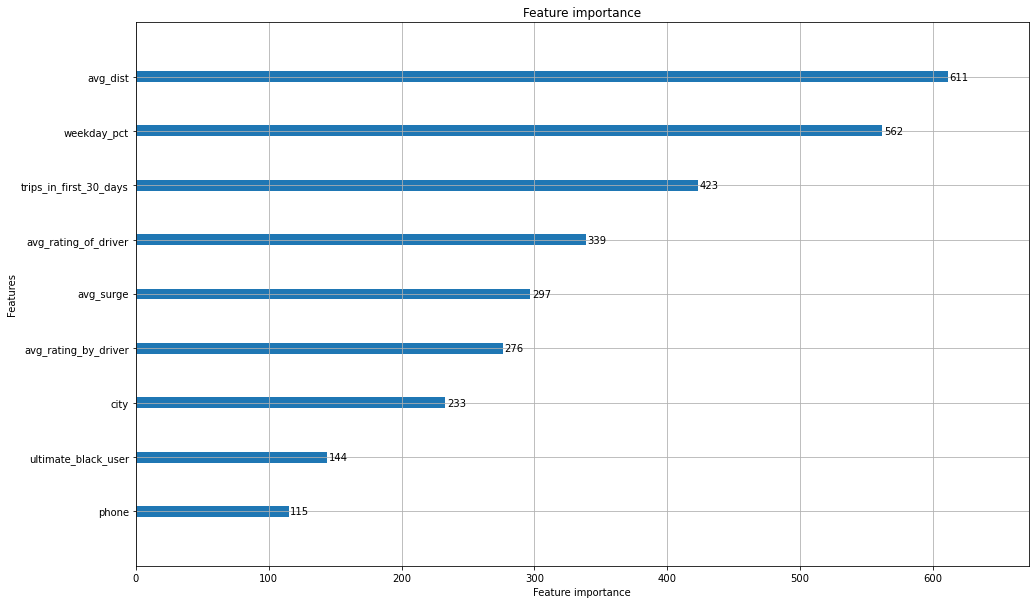

In [244]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(16, 10))
plot_importance(model,ax=ax)
plt.show()